# **Importing necessary libraries**

In [21]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# **Data Loading and EDA**

In [22]:
df = sns.load_dataset('tips')

In [23]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


There are both numeric and categirical features.

In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no missing values.

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**Total bill**
* The average (mean) total bill is about 19.79, with a standard deviation of approximately 8.90, indicating variability in the total bill amount.

* The minimum total bill is 3.07, and the maximum is quite high at $50.81, suggesting a wide range in the amounts customers spend.

* The median total bill (50th percentile) is $17.80, which is less than the mean, indicating a right-skewed distribution.

**Tip**
* The average tip is approximately 2.99 with a standard deviation of about 1.38, which shows that tip amounts also vary but less so than the total bill.

* The smallest tip given is 1.00, and the largest is $10.00, showing that there's a significant difference in tipping behavior.

* The median tip is $2.90, very close to the mean, suggesting a relatively symmetrical distribution of tip amounts around the central value.

* The 25th percentile is 2.00 and the 75th is 3.56, indicating that most tips are within this range.

**Size**
* The average size of a party is approximately 2.57 people with a standard deviation of 0.95, which means most parties are between 2 to 3 people, with not much variation.

* The smallest party size is 1 person, and the largest is 6.

* Both the median and the 25th percentile are at 2 people per party, while the 75th percentile is at 3, suggesting that more than 75% of the parties consist of 3 or fewer people.




<ipython-input-10-96ac31f4967e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

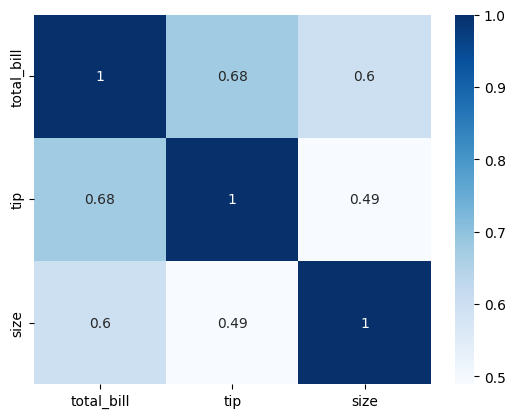

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

* There is a positive correlation of 0.68 between the total bill and the tip amount. This indicates that, as the total bill increases, the tip amount tends to increase as well.

* The correlation between the total bill and party size is 0.6, suggesting a moderately strong relationship. This means that larger parties tend to spend more money at the restaurant.

* The correlation of 0.49 between the tip amount and party size is weaker than the other two correlations but still positive, indicating that as the size of the party increases, the tip amount also tends to increase.

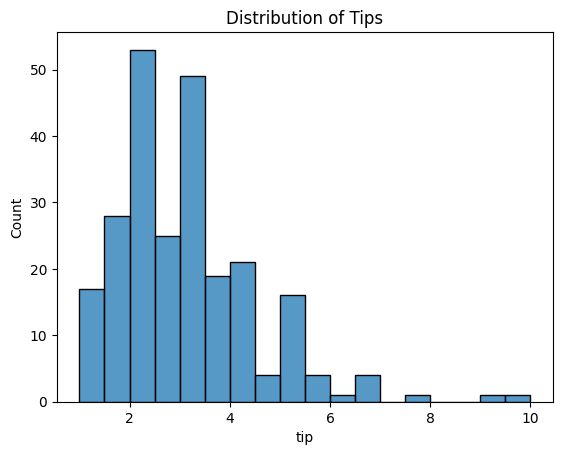

In [ ]:
sns.histplot(x='tip', data=df)
plt.title('Distribution of Tips')
plt.show()

The distribution is right skewed.

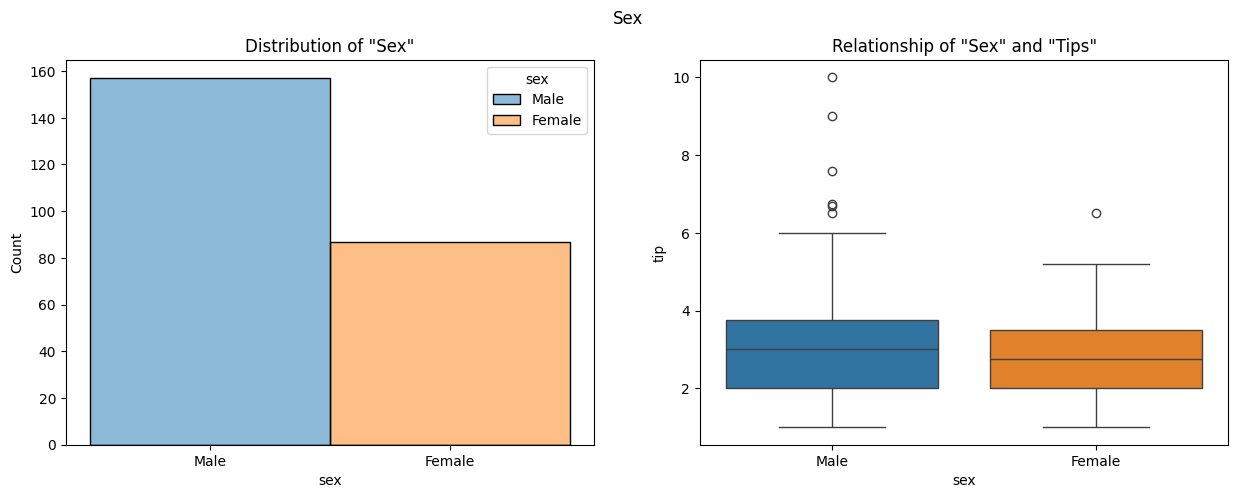

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Sex')

sns.histplot(x='sex', data=df, hue='sex', ax=ax[0])
sns.boxplot(x='sex', y='tip', hue='sex', data=df, ax=ax[1])

ax[0].set_title('Distribution of "Sex"')
ax[1].set_title('Relationship of "Sex" and "Tips"')

plt.show()

While males represented a larger proportion of the bill payers in this dataset, the tipping behavior between males and females shows some similarities in terms of the typical range of tips. The median tip appears to be slightly higher for males than for females,but the interquartile range is similar for both genders, indicating that the middle 50% of tips fall within a similar range.

The presence of outliers in both categories shows that there are instances of both males and females giving tips that are considerably higher than the typical range.

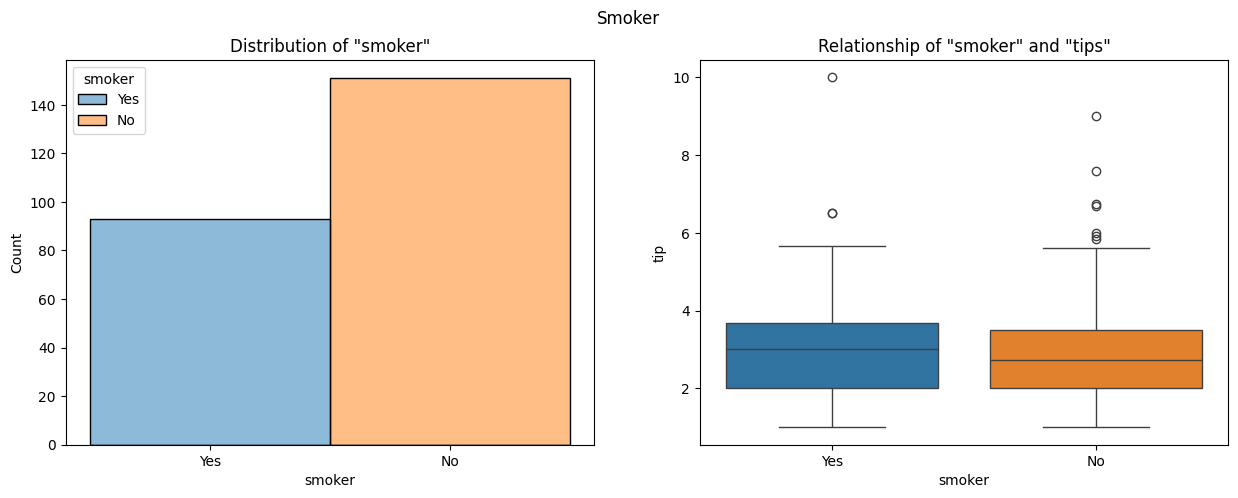

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Smoker')

sns.histplot(x='smoker', data=df, hue='smoker', ax=ax[0])
sns.boxplot(x='smoker', y='tip', hue='smoker', data=df, ax=ax[1])

ax[0].set_title('Distribution of "smoker"')
ax[1].set_title('Relationship of "smoker" and "tips"')

plt.show()

Based on the distribution, more people who payed the bill are non smoker.

Like sex, whether the person paying the bill is a smoker or not doesnt matter on how much they will tip.

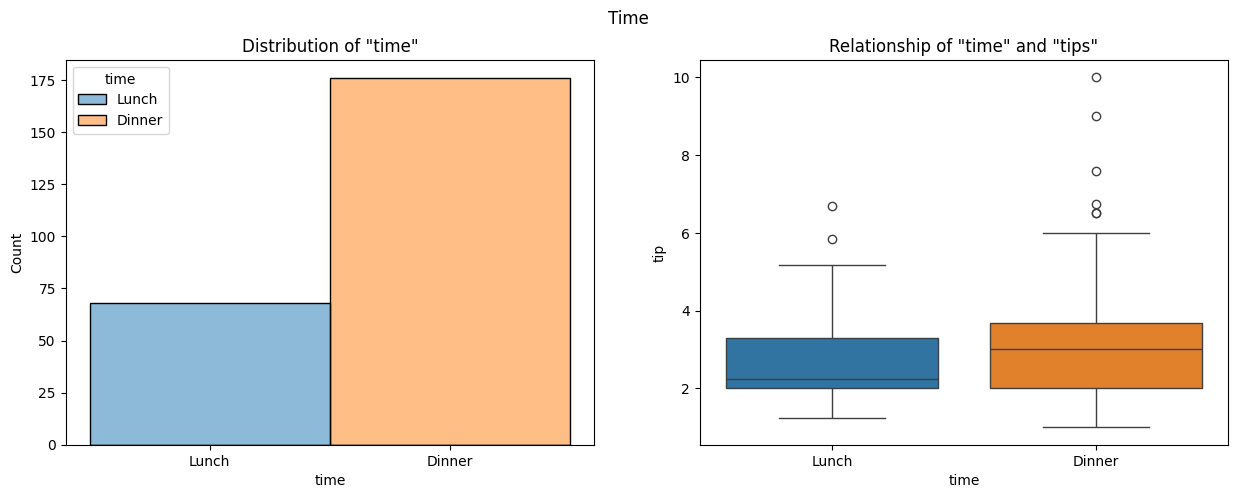

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Time')

sns.histplot(x='time', data=df, hue='time', ax=ax[0])
sns.boxplot(x='time', y='tip', hue='time', data=df, ax=ax[1])

ax[0].set_title('Distribution of "time"')
ax[1].set_title('Relationship of "time" and "tips"')

plt.show()

Theres more people going to the restaurant for dinner than lunch.

In dinner, the tips are slightly higher and more varied than on lunch.

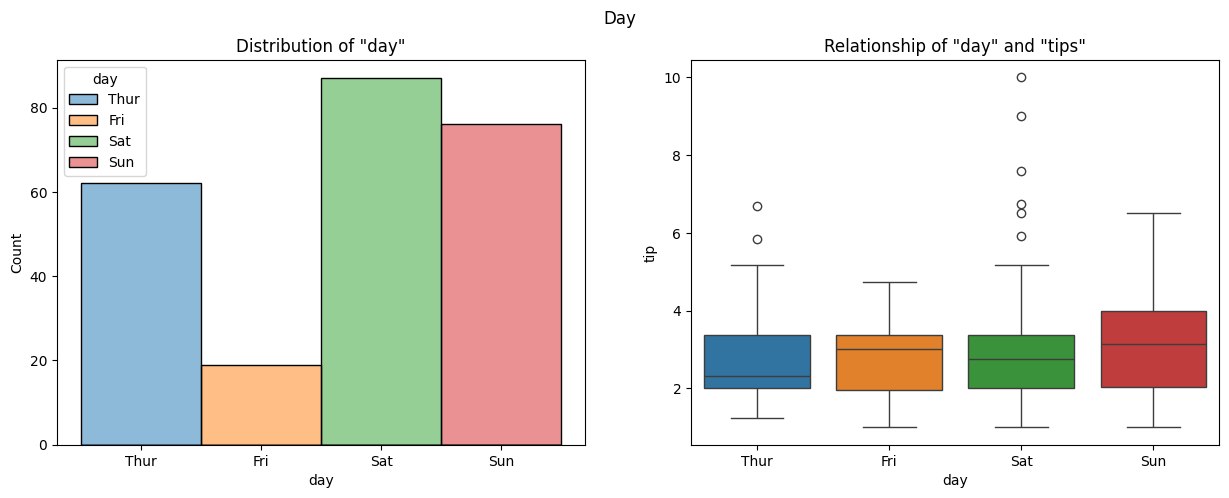

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Day')

sns.histplot(x='day', data=df, hue='day', ax=ax[0])
sns.boxplot(x='day', y='tip', hue='day', data=df, ax=ax[1])

ax[0].set_title('Distribution of "day"')
ax[1].set_title('Relationship of "day" and "tips"')

plt.show()

There are more group of people who goes to the restaurant on Saturday followed by Sunday, Thursday and Friday.

Although the day of the week seems to have minimal impact on the amount of tips but at Sunday, it looks like the tips are slightly higher than other days.

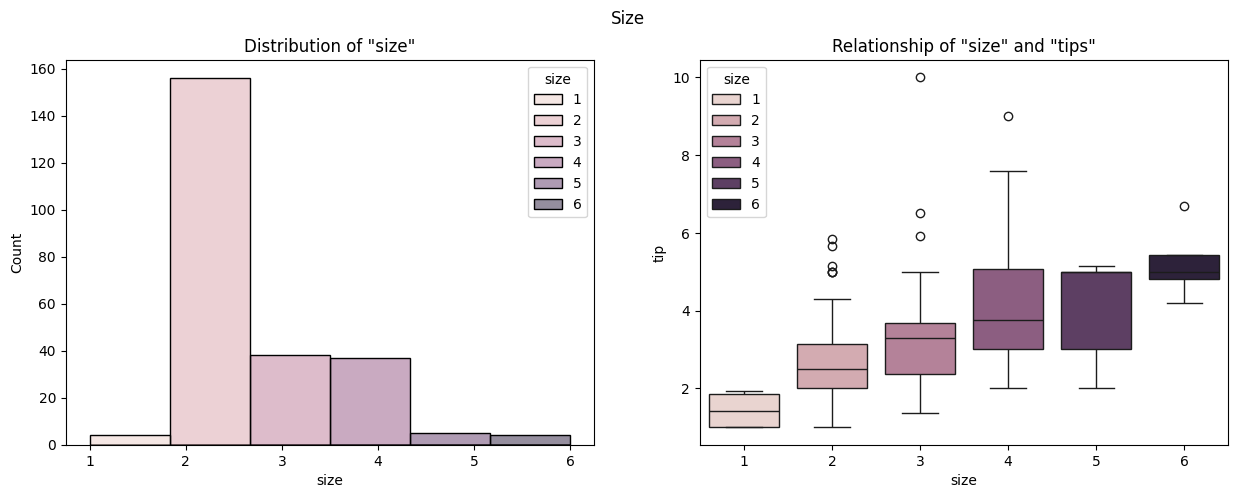

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Size')

sns.histplot(x='size', data=df, hue='size', ax=ax[0], binwidth=.9)
sns.boxplot(x='size', y='tip', hue='size', data=df, ax=ax[1])

ax[0].set_title('Distribution of "size"')
ax[1].set_title('Relationship of "size" and "tips"')

plt.show()

Based on the distribution above, Group of people who goes to the restaurant are usually group of 2 followed by 3, 4, 5 and 1 and 6.

Additionally, there is a predictable trend showing that larger groups tend to leave bigger tips.

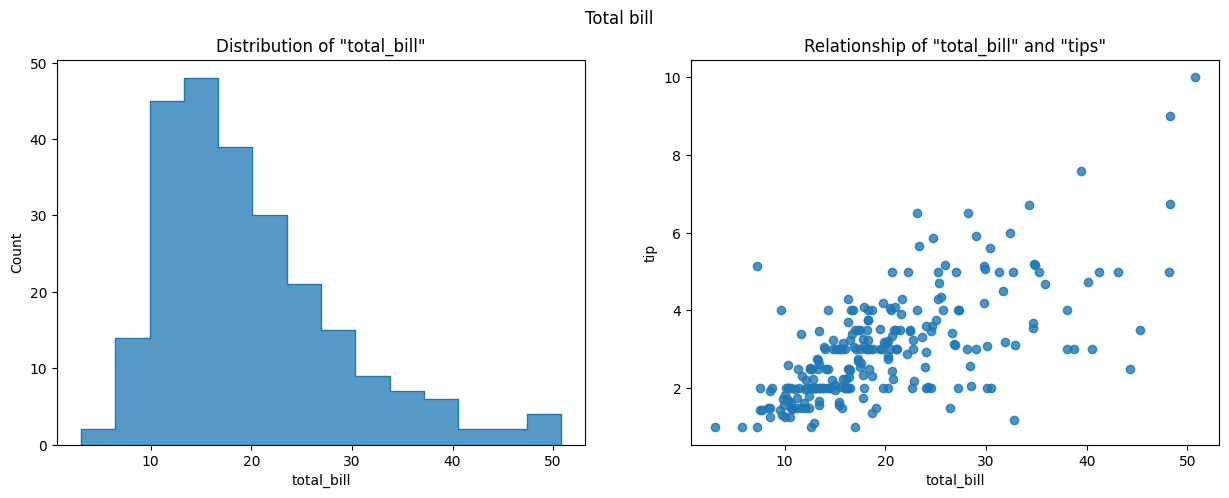

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

fig.suptitle('Total bill')

sns.histplot(x='total_bill', data=df, element='step', ax=ax[0])
sns.regplot(x='total_bill', y='tip', data=df, fit_reg=False, ax=ax[1])

ax[0].set_title('Distribution of "total_bill"')
ax[1].set_title('Relationship of "total_bill" and "tips"')

plt.show()

The total_bill distribution seems to be right skewed.

Here we can see the relationship of tip and total_bill variable and we can clearly see that they are positively correlated to each other.

#  **Data Preprocessing**

In [24]:
scaler = preprocessing.MinMaxScaler()
df[["tip"]] = scaler.fit_transform(df[["tip"]])
df[["total_bill"]] = scaler.fit_transform(df[["total_bill"]])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,Female,No,Sun,Dinner,2
1,0.152283,0.073333,Male,No,Sun,Dinner,3
2,0.375786,0.277778,Male,No,Sun,Dinner,3
3,0.431713,0.256667,Male,No,Sun,Dinner,2
4,0.450775,0.290000,Female,No,Sun,Dinner,4


In [25]:
X = df.drop(columns=['tip'])
y = df['tip']

In [26]:
label_encoders = {}
for col in X.columns:
    if X[col].dtype.name == 'category':
        label = LabelEncoder()
        X[col] = label.fit_transform(X[col])
        label_encoders[col] = label
X.head()


,total_bill,sex,smoker,day,time,size
0,0.291579,0,0,2,0,2
1,0.152283,1,0,2,0,3
2,0.375786,1,0,2,0,3
3,0.431713,1,0,2,0,2
4,0.450775,0,0,2,0,4


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Regression Analysis**

In [ ]:
models = {}

def train_validate_predict(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Ensure predictions are positive before calculating MSLE
    y_pred_adj = np.maximum(y_pred, 0)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred_adj)

    # Store metrics in a dictionary under the model's name
    models[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MSLE': msle
    }

# List of model classes
model_list = [
    LinearRegression, Lasso, Ridge, BayesianRidge,
    DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
    RandomForestRegressor
]

# Corresponding model names
model_names = [
    'Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge',
    'Decision Tree Regressor', 'Linear SVR', 'KNeighbors Regressor',
    'Random Forest Regressor'
]

# Train and validate each model
for model_name, model_cls in zip(model_names, model_list):
    train_validate_predict(model_cls(), X_train, y_train, X_test, y_test, model_name)

# Models dictionary containing the evaluation metrics for each model
for name, metrics in models.items():
    print(name)
    for metric, value in metrics.items():
        print(f'{metric}: {value:.5f}')
    print('----------------')


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear Regression
MSE: 0.01133
MAE: 0.07859
R2: 0.27054
MSLE: 0.00769
----------------
Lasso
MSE: 0.01626
MAE: 0.10883
R2: -0.04675
MSLE: 0.01134
----------------
Ridge
MSE: 0.01106
MAE: 0.08101
R2: 0.28758
MSLE: 0.00750
----------------
Bayesian Ridge
MSE: 0.01118
MAE: 0.07933
R2: 0.28037
MSLE: 0.00759
----------------
Decision Tree Regressor
MSE: 0.02625
MAE: 0.11424
R2: -0.69009
MSLE: 0.01600
----------------
Linear SVR
MSE: 0.01170
MAE: 0.08362
R2: 0.24635
MSLE: 0.00791
----------------
KNeighbors Regressor
MSE: 0.02152
MAE: 0.11589
R2: -0.38601
MSLE: 0.01344
----------------
Random Forest Regressor
MSE: 0.01170
MAE: 0.07695
R2: 0.24631
MSLE: 0.00779
----------------


## Analysis of Regression Models on the Full Dataset

### Ridge Regression:
- Exhibits the **highest R2 score (0.28758)** in this comparison, indicating it accounts for a significant portion of the variance in tips.
- Presents the **lowest MSE (0.01106)** and **MSLE (0.00750)** among the models, demonstrating its effectiveness in managing both absolute and relative prediction errors.
- The **MAE (0.08101)** is relatively low, further underscoring its robustness, particularly against outliers.

### Bayesian Ridge:
- Shows a performance closely akin to Ridge Regression, with a marginally lower **R2 score**, implying a slightly lesser but still substantial explanation of the variance in the dataset.
- Maintains low scores in both **MSE** and **MSLE**, indicating competitive accuracy in handling errors.
- Consistently performs well in terms of **MAE**, reinforcing its overall steady performance across different error types.

### Linear Regression and Linear SVR:
- Both models demonstrate moderate **R2 scores**, with Linear SVR slightly underperforming in this particular set compared to previous analyses.
- **MSE** and **MSLE** scores are comparable and competitive for both models, suggesting adeptness in handling errors.
- Despite their competence in error management, they do not quite match the performance level of Ridge Regression in this analysis.

### Random Forest Regressor:
- Records a lower **R2 score (0.18105)** compared to Ridge Regression, indicative of its reduced capacity to explain variance in the tips.
- Higher **MSE** and **MSLE** scores suggest less efficiency in handling both skewness and absolute errors compared to the Ridge model.
- While the **MAE** is comparable to other models, the additional metrics suggest it is somewhat outperformed by Ridge Regression in this context.

### Conclusion
Based on these results, **Ridge Regression** emerges as the most effective model. It achieves a balanced high R2 score and low values for MSE and MSLE, demonstrating its ability to effectively handle both the magnitude and relative size of prediction errors. This balance is particularly crucial when dealing with skewed data, such as tip amounts.



In [ ]:
model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

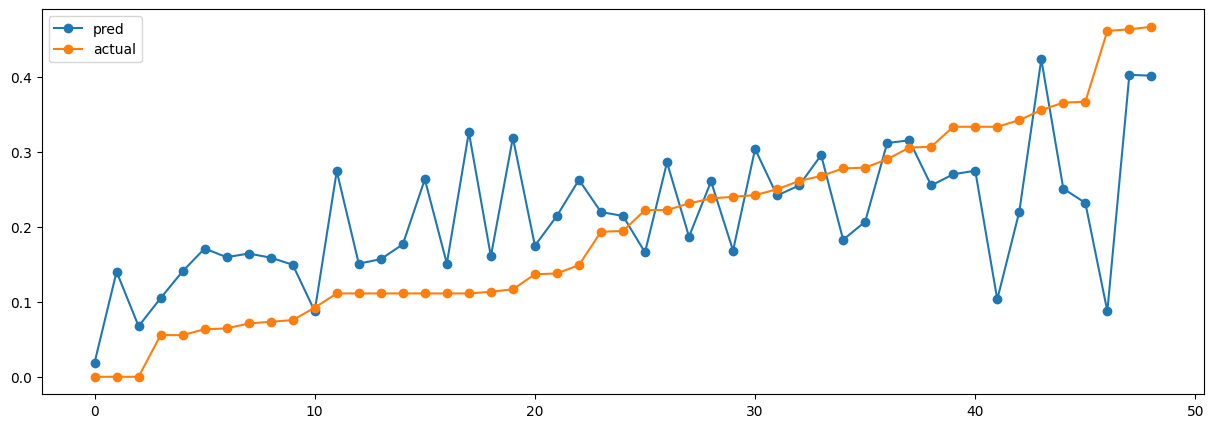

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', marker='o')
plt.plot(preds['y_test'], label='actual', marker='o')
plt.legend()
plt.show()

So looking at graphs and analyzing them, I have concluded that columns "total_bill", "size" and "day" are the columns that affects tip most.

In [ ]:
X = df[['total_bill', 'size']]
X = pd.get_dummies(X.join(df['day']), drop_first=True)

# Target variable is 'tip'
y = df['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {}

def train_validate_predict(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Ensure predictions are positive before calculating MSLE
    y_pred_adj = np.maximum(y_pred, 0)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred_adj)

    # Store metrics in a dictionary under the model's name
    models[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'MSLE': msle
    }

# List of model classes
model_list = [
    LinearRegression, Lasso, Ridge, BayesianRidge,
    DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
    RandomForestRegressor
]

# Corresponding model names
model_names = [
    'Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge',
    'Decision Tree Regressor', 'Linear SVR', 'KNeighbors Regressor',
    'Random Forest Regressor'
]

# Train and validate each model
for model_name, model_cls in zip(model_names, model_list):
    train_validate_predict(model_cls(), X_train, y_train, X_test, y_test, model_name)

# Models' dictionary containing the evaluation metrics for each model
for name, metrics in models.items():
    print(name)
    for metric, value in metrics.items():
        print(f'{metric}: {value:.5f}')
    print('----------------')


Linear Regression
MSE: 0.00822
MAE: 0.07324
R2: 0.46753
MSLE: 0.00537
----------------
Lasso
MSE: 0.01788
MAE: 0.11634
R2: -0.15896
MSLE: 0.01248
----------------
Ridge
MSE: 0.00844
MAE: 0.07535
R2: 0.45316
MSLE: 0.00565
----------------
Bayesian Ridge
MSE: 0.00826
MAE: 0.07393
R2: 0.46488
MSLE: 0.00545
----------------
Decision Tree Regressor
MSE: 0.02004
MAE: 0.10741
R2: -0.29862
MSLE: 0.01202
----------------
Linear SVR
MSE: 0.00876
MAE: 0.07497
R2: 0.43214
MSLE: 0.00555
----------------
KNeighbors Regressor
MSE: 0.01063
MAE: 0.07394
R2: 0.31137
MSLE: 0.00704
----------------
Random Forest Regressor
MSE: 0.00935
MAE: 0.07673
R2: 0.39432
MSLE: 0.00613
----------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Regression Model Analysis with Selected Features

After refining the regression analysis to focus on the features "total_bill", "size", and "day", I have derived the following insights from the results:

### Linear Regression:
- Demonstrates the **lowest MSE (0.00822)** and the **lowest MSLE (0.00537)** amongst all models, suggesting strong performance in minimizing both absolute and relative prediction errors.
- Achieves the **highest R2 score (0.46753)**, indicating a significant explanatory power over the variance in tips.
- Exhibits the **lowest MAE (0.07324)**, which implies minimal average error per prediction, indicating a consistent performance across predictions.

### Ridge Regression:
- MSE and MSLE are slightly higher than Linear Regression, yet indicating effective error management.
- A marginally lower **R2 score (0.45316)** compared to Linear Regression, however, it still captures a robust proportion of variance in tips.
- The MAE is slightly higher than Linear Regression, indicating minor deviations from actual values.

### Bayesian Ridge:
- Performs competitively close to Linear Regression with MSE, MAE, and MSLE scores, and a high R2 score of **0.46488**, positioning it as a nearly equivalent alternative.
- The probabilistic approach of Bayesian Ridge could offer benefits in scenarios with data uncertainty or variability.

### Linear SVR:
- Records a higher MSE and MSLE than Linear Regression, which could suggest less precision in handling errors.
- The R2 score of **0.43214** is less than Linear Regression, signifying less variance explained by the model.
- MAE is comparatively low but not the lowest, indicating satisfactory predictive accuracy.

### Random Forest Regressor:
- Indicates an increased MSE and MSLE compared to Linear Regression, which may point to less effectiveness in managing prediction errors.
- With an R2 score of **0.39432**, it demonstrates a lower capacity to explain the variance in tip amounts.
- Exhibits a higher MAE than Linear Regression, suggesting greater average deviations.

Given the analysis, **Linear Regression** emerges as the most suitable model for predicting tips based on the selected features. It consistently outperforms other models across all evaluation metrics.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
preds = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

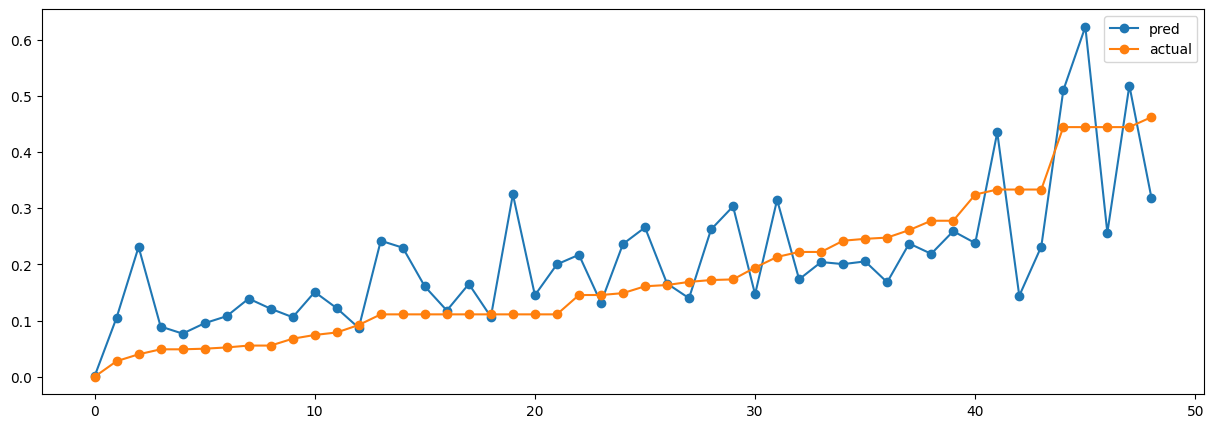

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', marker='o')
plt.plot(preds['y_test'], label='actual', marker='o')
plt.legend()
plt.show()